In [368]:
# Read Data

In [470]:
import pandas as pd
from sklearn import tree
def read_data():
    data = pd.read_table('./vertebral_column_data/column_3C.dat',header=None, sep=' ')
    data.columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius',
                    'degree_spondylolisthesis', 'class']
    return data

def generate_data_info(data):
    features_set = data.columns[:6]
    label_name = data.columns[6]
    training_labels = data.iloc[:,6]
    overall_features_data = data.iloc[:, :6]
    return features_set, label_name, training_labels, overall_features_data

In [471]:
# Train Split

In [472]:
from sklearn.model_selection import train_test_split
def train_split(test_size, shuffle, random_state):
    data = read_data()
    features_set, label_name, training_labels, overall_features_data = generate_data_info(data)
    data_train, data_test, labels_train, labels_test = train_test_split(overall_features_data, training_labels,
                                                                        test_size=test_size, shuffle=True,
                                                                        random_state=random_state, 
                                                                        stratify=training_labels)
    return data_train, data_test, labels_train, labels_test, features_set

In [473]:
# Construct Random Forest and Gaussian NB model

In [474]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn import metrics


def construct_random_forest_model(n_estimators, data_train, labels_train, model_random_state):
    model = RandomForestClassifier(n_estimators = n_estimators, random_state = model_random_state)
    model = model.fit(data_train, labels_train)
    return model 


In [475]:
from sklearn.naive_bayes import GaussianNB
def construct_gaussian_nb_model(data_train, label_train):
    nb = GaussianNB()
    nb = nb.fit(data_train, label_train)
    return nb

In [476]:
# Return Random Forest and Gaussian NB model

In [477]:
def return_random_forest_model(n_estimators, test_size, model_random_state, random_state):
    features_set, label_name, training_labels, overall_features_data = generate_data_info(read_data())
    data_train, data_test, labels_train, labels_test, features_set=train_split(test_size, True, random_state)
    clf = construct_random_forest_model(n_estimators, data_train, labels_train, model_random_state)
    return clf, data_test, labels_test
                        

In [478]:
def return_gaussian_nb_model(test_size, random_state):
    features_set, label_name, training_labels, overall_features_data = generate_data_info(read_data())
    data_train, data_test, labels_train, labels_test, features_set=train_split(test_size, True, random_state)
    clf = construct_gaussian_nb_model(data_train, labels_train)
    return clf, data_test, labels_test

In [479]:
# Train and Get the accuracy Score of Random Forest and Gaussian NB Model

In [480]:
from sklearn.metrics import accuracy_score
def train_and_get_accuracy_random_forest(n_estimators, test_size, model_random_state, random_state):
    clf, data_test, labels_test = return_random_forest_model(n_estimators, test_size, model_random_state, random_state)
    label_predict = clf.predict(data_test)
    scores = accuracy_score(labels_test, label_predict)
#     print(clf.target_names[clf])
    return clf, scores, data_test, labels_test

In [481]:
def train_and_get_accuracy_gaussian_nb(test_size, random_state):
    clf, data_test, labels_test = return_gaussian_nb_model(test_size, random_state)
    label_predict = clf.predict(data_test)
    scores = accuracy_score(labels_test, label_predict)
#     print(clf.target_names[clf])
    return clf, scores, data_test, labels_test

In [482]:
# Data Visualization

In [483]:
import matplotlib.pyplot as plt
%matplotlib inline
def visualize_data(x_array, y_array, x_label, y_label, graph_name):
    plt.title(graph_name)
    plt.plot(x_array, y_array)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig('./Random_Forest_Analysis_Graph/{}.jpg'.format(graph_name))
    plt.show()

In [484]:
# Train and get the result of Random Forest Model

In [485]:
def get_the_whole_process():
    test_size = 0.1
    random_state = 27
    model_random_state = 0
    n_estimators_list = []
    scores = []
    max_scores = 0
    max_estimators = 0
    for n_est in list(range(1,200))+list(range(200, 1000, 10)):
        clf, tmp_score, data_test, labels_test = train_and_get_accuracy_random_forest(n_est, test_size, model_random_state, random_state)
        if tmp_score > max_scores:
            max_scores = tmp_score
            max_estimators = n_est
        n_estimators_list.append(n_est)
        scores.append(tmp_score)
        print("n_estimator: ", n_est, "Accuracy Scores: ", tmp_score)
    return max_estimators, max_scores, n_estimators_list, scores

In [597]:
def get_the_whole_process_q_d(test_size):
    test_size = test_size
    random_state = 27
    model_random_state = 0
    n_estimators_list = []
    scores = []
    max_scores = 0
    max_estimators = 0
    for n_est in list(range(1,200))+list(range(200, 1000, 10)):
        clf, tmp_score, data_test, labels_test = train_and_get_accuracy_random_forest(n_est, test_size, model_random_state, random_state)
        if tmp_score > max_scores:
            max_scores = tmp_score
            max_estimators = n_est
        n_estimators_list.append(n_est)
        scores.append(tmp_score)
#         print("n_estimator: ", n_est, "Accuracy Scores: ", tmp_score)
    return max_estimators, max_scores, n_estimators_list, scores

In [598]:
def get_the_gaussian_nb_q_d(test_size):
    test_size = test_size
    random_state = 27
    clf, tmp_score, data_test, labels_test = train_and_get_accuracy_gaussian_nb(test_size, random_state)
    return clf, tmp_score, data_test, labels_test

In [599]:
import numpy as np
def generate_the_graph_q_d():
    test_size_list = []
    random_forest_scores_list = []
    gaussian_nb_scores_list = []
    for t_size in np.arange(0.1, 1, 0.1):
        test_size_list.append(t_size)
        max_estimators, max_scores, x_array, y_array = get_the_whole_process_q_d(t_size)
        nb, nb_score, data_test, labels_test= get_the_gaussian_nb_q_d(t_size)
        random_forest_scores_list.append(max_scores)
        gaussian_nb_scores_list.append(nb_score)
        print('Succeed at:', t_size)
    graph_name = 'Model Accuracy Scores of RF and NB'
    x_label = 'Test Size'
    y_label = 'Accuracy Scores'
    rf_name = 'Random Forest Classifier'
    nb_name = 'Gaussian Naive Bayes Classifier'
    visualize_comparison_of_two_models(test_size_list, random_forest_scores_list, gaussian_nb_scores_list, x_label, y_label, rf_name, nb_name, graph_name)
    
    

Succeed at: 0.1
Succeed at: 0.2
Succeed at: 0.30000000000000004
Succeed at: 0.4
Succeed at: 0.5
Succeed at: 0.6
Succeed at: 0.7000000000000001
Succeed at: 0.8
Succeed at: 0.9


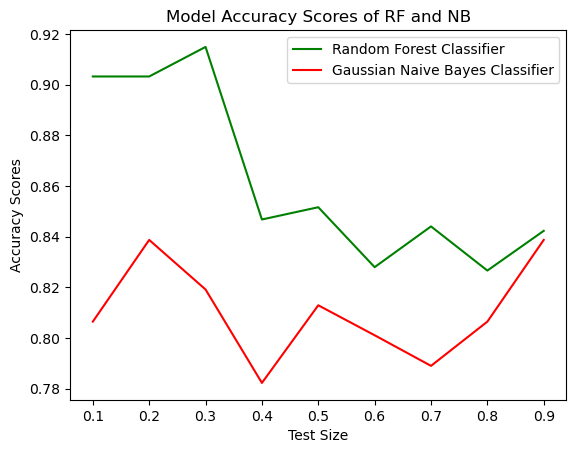

In [600]:
generate_the_graph_q_d()

In [443]:
def get_the_gaussian_nb():
    test_size = 0.1
    random_state = 27
    clf, tmp_score, data_test, labels_test = train_and_get_accuracy_gaussian_nb(test_size, random_state)
    return clf, tmp_score, data_test, labels_test

In [444]:
def generate_the_gaussian_nb_result():
    clf, tmp_score, data_test, labels_test = get_the_gaussian_nb()
    print("Gaussian Scores: ", tmp_score)

In [445]:
def generate_the_graph():
    max_estimators, max_scores, x_array, y_array = get_the_whole_process()
    print("Max Estimators: ", max_estimators)
    print("Max Scores: ", max_scores)
    graph_name = 'performance of n_estimators'
    x_label = 'n_estimators'
    y_label = 'scores'
    visualize_data(x_array, y_array, x_label, y_label, graph_name)

In [446]:
generate_the_gaussian_nb_result()

Gaussian Scores:  0.8064516129032258


In [ ]:
# Question A Data Generation

n_estimator:  1 Accuracy Scores:  0.7419354838709677
n_estimator:  2 Accuracy Scores:  0.8064516129032258
n_estimator:  3 Accuracy Scores:  0.7741935483870968
n_estimator:  4 Accuracy Scores:  0.8387096774193549
n_estimator:  5 Accuracy Scores:  0.7741935483870968
n_estimator:  6 Accuracy Scores:  0.8064516129032258
n_estimator:  7 Accuracy Scores:  0.7741935483870968
n_estimator:  8 Accuracy Scores:  0.8064516129032258
n_estimator:  9 Accuracy Scores:  0.7741935483870968
n_estimator:  10 Accuracy Scores:  0.8387096774193549
n_estimator:  11 Accuracy Scores:  0.8387096774193549
n_estimator:  12 Accuracy Scores:  0.8709677419354839
n_estimator:  13 Accuracy Scores:  0.8387096774193549
n_estimator:  14 Accuracy Scores:  0.8387096774193549
n_estimator:  15 Accuracy Scores:  0.8387096774193549
n_estimator:  16 Accuracy Scores:  0.8709677419354839
n_estimator:  17 Accuracy Scores:  0.8387096774193549
n_estimator:  18 Accuracy Scores:  0.8387096774193549
n_estimator:  19 Accuracy Scores:  0.

n_estimator:  153 Accuracy Scores:  0.9032258064516129
n_estimator:  154 Accuracy Scores:  0.9032258064516129
n_estimator:  155 Accuracy Scores:  0.9032258064516129
n_estimator:  156 Accuracy Scores:  0.8709677419354839
n_estimator:  157 Accuracy Scores:  0.8709677419354839
n_estimator:  158 Accuracy Scores:  0.8709677419354839
n_estimator:  159 Accuracy Scores:  0.8709677419354839
n_estimator:  160 Accuracy Scores:  0.8709677419354839
n_estimator:  161 Accuracy Scores:  0.8709677419354839
n_estimator:  162 Accuracy Scores:  0.8709677419354839
n_estimator:  163 Accuracy Scores:  0.8709677419354839
n_estimator:  164 Accuracy Scores:  0.8709677419354839
n_estimator:  165 Accuracy Scores:  0.8709677419354839
n_estimator:  166 Accuracy Scores:  0.8709677419354839
n_estimator:  167 Accuracy Scores:  0.8709677419354839
n_estimator:  168 Accuracy Scores:  0.8709677419354839
n_estimator:  169 Accuracy Scores:  0.8709677419354839
n_estimator:  170 Accuracy Scores:  0.8709677419354839
n_estimato

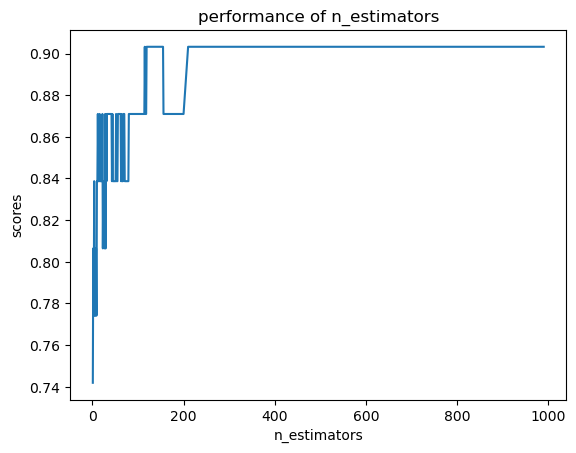

Gaussian Scores:  0.8064516129032258


In [447]:
generate_the_graph()
generate_the_gaussian_nb_result()

In [492]:
# Question B Analysis

In [569]:
from sklearn import preprocessing
def generate_the_scores_of_the_component_trees(n_est, test_size, model_random_state, random_state):
    features_set = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']
    features_importance_list = []
    clf, model_scores, data_test, label_test = train_and_get_accuracy_random_forest(n_est, test_size, model_random_state, random_state)
    component_tree_index_list = list(range(len(clf.estimators_)))
    component_trees_scores_list = []
    total_scores = 0
    print("Number of Component Trees: ", len(clf.estimators_))
    for i in range(len(clf.estimators_)):
        model = clf.estimators_[i]
        print(model)
        label_predict = model.predict(data_test)
        le = preprocessing.LabelEncoder()
        labels = le.fit_transform(label_test)
        features_importance_list.append(model.feature_importances_)
#         print(model.feature_importances_)
        tmp_score = accuracy_score(labels, label_predict)
        print('model', i, ': ', tmp_score)
        component_trees_scores_list.append(tmp_score)
        total_scores += tmp_score
        save_component_tree_file(model, i)
    
    mean_scores = total_scores/len(clf.estimators_)
    print('Model Scores: ', model_scores, 'Mean scores: ', mean_scores)
    visualize_features_importance(component_tree_index_list, features_importance_list, 'Component Tree Index', 'features importance', features_set, 'Features Importance')
    visualize_features_importance_for_each(component_tree_index_list,  features_importance_list,'Component Tree Index', 'features importance', features_set, 'Features_Importance_Graph')
    visualize_component_trees_performance(component_tree_index_list, component_trees_scores_list, model_scores, mean_scores, '', 'Accuracy Scores', 'Component Trees Performance') 
    visualize_average_features_importance_for_each(component_tree_index_list,  features_importance_list,'Component Tree Index', 'features importance', features_set,'Mean_Features_Importance_Graph')
    for i in range(len(features_set)):
        cur_features = features_set[i]
        cur_x_array = component_tree_index_list
        y_array = np.array(features_importance_list)
        cur_y_array = y_array[:, i]
        mean_scores = sum(cur_y_array)/len(cur_y_array)
        averaged_y_array = [mean_scores for i in range(len(cur_y_array))]
        print('Mean Feature Importance of {}: '.format(cur_features), mean_scores)
    

    

In [570]:
import numpy as np
def visualize_features_importance(x_array, y_array, x_label, y_label, features_name, graph_name):
    plt.title(graph_name)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    colors_list = ['b', 'c', 'k', 'r', 'g', 'y']
    for i in range(len(features_name)):
        cur_features = features_name[i]
        cur_x_array = x_array
        y_array = np.array(y_array)
        cur_y_array = y_array[:, i]
        plt.plot(cur_x_array, cur_y_array, c=colors_list[i], label=cur_features)
#         plt.subplot(3, 2, i)
#         plt.plot(cur_x_array, cur_y_array)
#         plt.title("plot for {}".format(cur_features))
    plt.legend()
    plt.savefig('./Random_Forest_Analysis_Graph/{}.jpg'.format(graph_name))
    plt.show()

In [574]:
import numpy as np
def visualize_features_importance_for_each(x_array, y_array, x_label, y_label, features_name, graph_name):
    plt.title(graph_name)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    colors_list = ['b', 'c', 'k', 'r', 'g', 'y']
    for i in range(len(features_name)):
        cur_features = features_name[i]
        cur_x_array = x_array
        y_array = np.array(y_array)
        cur_y_array = y_array[:, i]
        plt.subplot(2, 3, i+1)
        plt.plot(cur_x_array, cur_y_array, label=cur_features)
        plt.title("{}".format(cur_features))
        plt.legend()
    plt.subplots_adjust(wspace =0.3, hspace =0.3)
    plt.suptitle("Features Importance Graph")
#     plt.savefig('./Random_Forest_Analysis_Graph/{}.jpg'.format('Features_Importance_Graph'))
    plt.show()
    

In [575]:
import numpy as np
def visualize_component_trees_performance(x_array, y_array, model_scores, mean_scores, x_label, y_label, graph_name):
    plt.title(graph_name)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    colors_list = ['y', 'r', 'k', 'm', 'g', 'b']
    cur_x_array = x_array
    cur_y_array = y_array
    plt.plot(cur_x_array, cur_y_array, c=colors_list[0], label='Component Trees')
    model_scores_list = [model_scores for i in range(len(x_array))]
    plt.plot(cur_x_array, model_scores_list, c=colors_list[1], label='Random Forest Model')
    mean_scores_list = [mean_scores for i in range(len(x_array))]
    plt.plot(cur_x_array, mean_scores_list, c=colors_list[2], label='Component Trees Mean Scores')
    plt.legend()
    plt.savefig('./Random_Forest_Analysis_Graph/{}.jpg'.format(graph_name))
    plt.show()

In [576]:
import numpy as np
def visualize_average_features_importance_for_each(x_array, y_array, x_label, y_label, features_name, graph_name):
    plt.title(graph_name)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    colors_list = ['b', 'c', 'k', 'r', 'g', 'y']
    for i in range(len(features_name)):
        cur_features = features_name[i]
        cur_x_array = x_array
        y_array = np.array(y_array)
        cur_y_array = y_array[:, i]
        mean_scores = sum(cur_y_array)/len(cur_y_array)
        averaged_y_array = [mean_scores for i in range(len(cur_y_array))]
        plt.plot(cur_x_array, averaged_y_array, c=colors_list[i], label=cur_features)
#         plt.subplot(3, 2, i)
#         plt.plot(cur_x_array, cur_y_array)
#         plt.title("plot for {}".format(cur_features))
    plt.legend()
    plt.savefig('./Random_Forest_Analysis_Graph/{}.jpg'.format(graph_name))
    plt.show()

In [584]:
import numpy as np
def visualize_comparison_of_two_models(x_array, rf_array, nb_array, x_label, y_label, rf_name, nb_name, graph_name):
    plt.title(graph_name)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    colors_list = ['b', 'c', 'k', 'r', 'g', 'y']
    plt.plot(x_array, rf_array, c=colors_list[4], label=rf_name)
    plt.plot(x_array, nb_array, c=colors_list[3], label=nb_name)
    plt.legend()
    plt.savefig('./Random_Forest_Analysis_Graph/{}.jpg'.format(graph_name))
    plt.show()

In [577]:
import graphviz
def save_component_tree_file(model, i):
    dot_data = tree.export_graphviz(model, out_file=None,
        feature_names=features_set,
        class_names=label_name,
        filled=True, rounded=True,
        special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.format='png'
    graph.render('./Random_Forest_Analysis_Graph/ComponentTreeGraphs/Graph-{}'.format(i), view=False)

Number of Component Trees:  115
DecisionTreeClassifier(max_features='sqrt', random_state=209652396)
model 0 :  0.7419354838709677


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=398764591)
model 1 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=924231285)
model 2 :  0.6774193548387096


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1478610112)
model 3 :  0.8387096774193549


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=441365315)
model 4 :  0.7096774193548387


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1537364731)
model 5 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=192771779)
model 6 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1491434855)
model 7 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1819583497)
model 8 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=530702035)
model 9 :  0.7419354838709677


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=626610453)
model 10 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1650906866)
model 11 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1879422756)
model 12 :  0.7419354838709677


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1277901399)
model 13 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1682652230)
model 14 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=243580376)
model 15 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1991416408)
model 16 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1171049868)
model 17 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1646868794)
model 18 :  0.8387096774193549


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=2051556033)
model 19 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1252949478)
model 20 :  0.9032258064516129


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1340754471)
model 21 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=124102743)
model 22 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=2061486254)
model 23 :  0.8387096774193549


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=292249176)
model 24 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1686997841)
model 25 :  0.8387096774193549


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1827923621)
model 26 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1443447321)
model 27 :  0.9032258064516129


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=305097549)
model 28 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1449105480)
model 29 :  0.6451612903225806


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=374217481)
model 30 :  0.6451612903225806


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=636393364)
model 31 :  0.8387096774193549


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=86837363)
model 32 :  0.9032258064516129


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1581585360)
model 33 :  0.7419354838709677


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1428591347)
model 34 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1963466437)
model 35 :  0.967741935483871


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1194674174)
model 36 :  0.9032258064516129


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=602801999)
model 37 :  0.7419354838709677


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1589190063)
model 38 :  0.7096774193548387


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1589512640)
model 39 :  0.7419354838709677


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=2055650130)
model 40 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=2034131043)
model 41 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1284876248)
model 42 :  0.8387096774193549


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1292401841)
model 43 :  0.7096774193548387


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1982038771)
model 44 :  0.7096774193548387


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=87950109)
model 45 :  0.6129032258064516


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1204863635)
model 46 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=768281747)
model 47 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=507984782)
model 48 :  0.7096774193548387


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=947610023)
model 49 :  0.8709677419354839


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=600956192)
model 50 :  0.7096774193548387


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=352272321)
model 51 :  0.8387096774193549


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=615697673)
model 52 :  0.6774193548387096


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=160516793)
model 53 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1909838463)
model 54 :  0.7096774193548387


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1110745632)
model 55 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=93837855)
model 56 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=454869706)
model 57 :  0.7419354838709677


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1780959476)
model 58 :  0.7096774193548387


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=2034098327)
model 59 :  0.8387096774193549


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1136257699)
model 60 :  0.6129032258064516


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=800291326)
model 61 :  0.8387096774193549


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1177824715)
model 62 :  0.8387096774193549


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1017555826)
model 63 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1959150775)
model 64 :  0.7096774193548387


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=930076700)
model 65 :  0.8709677419354839


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=293921570)
model 66 :  0.8709677419354839


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=580757632)
model 67 :  0.8387096774193549


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=80701568)
model 68 :  0.8709677419354839


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1392175012)
model 69 :  0.5161290322580645


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=505240629)
model 70 :  0.7096774193548387


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=642848645)
model 71 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=481447462)
model 72 :  0.8387096774193549


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=954863080)
model 73 :  0.6129032258064516


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=502227700)
model 74 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1659957521)
model 75 :  0.9354838709677419


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1905883471)
model 76 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1729147268)
model 77 :  0.6451612903225806


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=780912233)
model 78 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1932520490)
model 79 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1544074682)
model 80 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=485603871)
model 81 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1877037944)
model 82 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1728073985)
model 83 :  0.967741935483871


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=848819521)
model 84 :  0.8709677419354839


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=426405863)
model 85 :  0.6774193548387096


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=258666409)
model 86 :  0.8709677419354839


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=2017814585)
model 87 :  0.7419354838709677


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=716257571)
model 88 :  0.7419354838709677


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=657731430)
model 89 :  0.9032258064516129


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=732884087)
model 90 :  0.8709677419354839


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=734051083)
model 91 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=903586222)
model 92 :  0.8387096774193549


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1538251858)
model 93 :  0.9354838709677419


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=553734235)
model 94 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1076688768)
model 95 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1354754446)
model 96 :  0.8387096774193549


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=463129187)
model 97 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1562125877)
model 98 :  0.8709677419354839


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1396067212)
model 99 :  0.6451612903225806


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=301492857)
model 100 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=165035946)
model 101 :  0.967741935483871


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1883779156)
model 102 :  0.8387096774193549


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=576702667)
model 103 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=2097549636)
model 104 :  0.8709677419354839


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1971172102)
model 105 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=438279108)
model 106 :  0.7096774193548387


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=656229423)
model 107 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=897118847)
model 108 :  0.8387096774193549


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=580073460)
model 109 :  0.7096774193548387


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=692819075)
model 110 :  0.7741935483870968


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=2127295436)
model 111 :  0.7419354838709677


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=657595236)
model 112 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=351544500)
model 113 :  0.8064516129032258


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


DecisionTreeClassifier(max_features='sqrt', random_state=1087879144)
model 114 :  0.6774193548387096


/Users/luopeiyuan/opt/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Model Scores:  0.9032258064516129 Mean scores:  0.7865357643758767


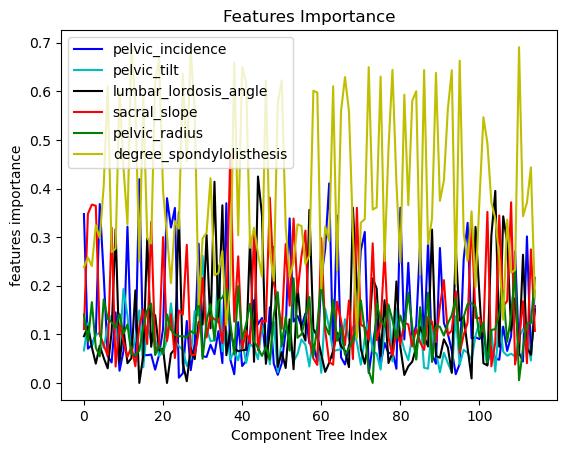

/var/folders/vg/kjg82bp52v3bphh6xlt9lfq00000gn/T/ipykernel_77468/669457922.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i+1)


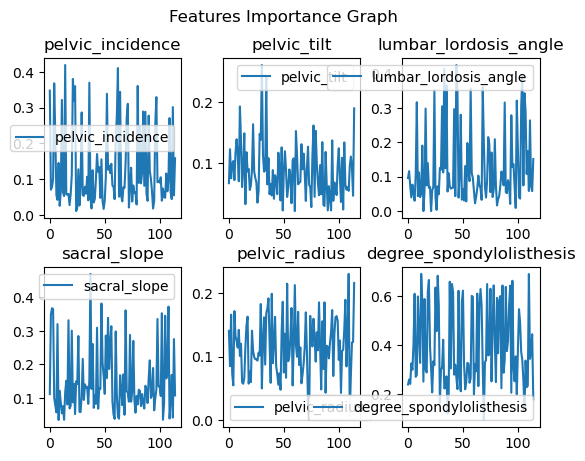

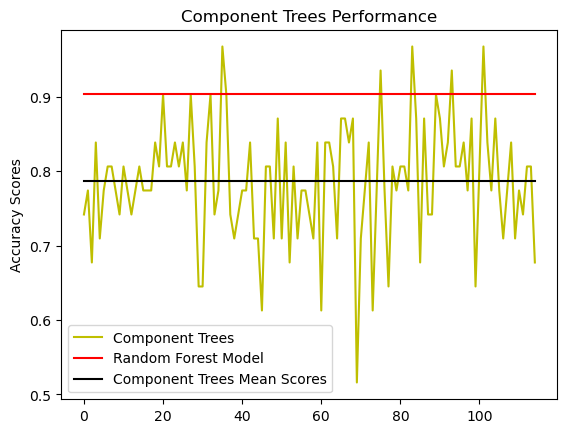

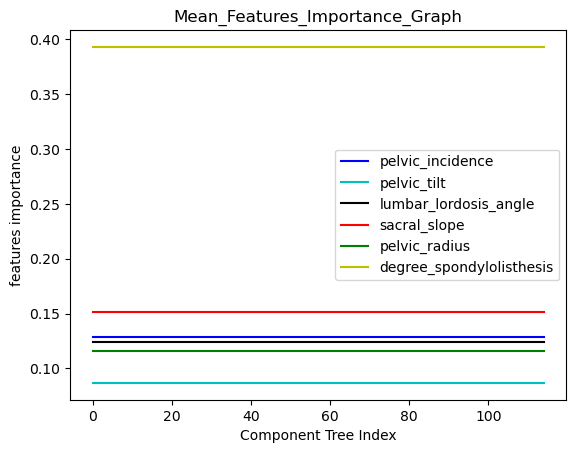

Mean Feature Importance of pelvic_incidence:  0.12863396105770825
Mean Feature Importance of pelvic_tilt:  0.08667147442890695
Mean Feature Importance of lumbar_lordosis_angle:  0.12414353670988675
Mean Feature Importance of sacral_slope:  0.15122335909960322
Mean Feature Importance of pelvic_radius:  0.11613742117405064
Mean Feature Importance of degree_spondylolisthesis:  0.3931902475298444


In [578]:
from sklearn import preprocessing
n_est = 115
test_size = 0.1
random_state = 27
model_random_state = 0
generate_the_scores_of_the_component_trees(n_est, test_size, model_random_state, random_state)
